In [2]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Get online cryptocurrency proces

In [3]:
end = dt.datetime.now()

start = dt.date( end.year - 5, end.month , end.day )  #trying to get data from 5 years ago

In [5]:
cryptolist = [ 'BTC-USD' , 'ETH-USD']   # pulling data for ethereum and bitcoin against USD

df = reader.get_data_yahoo( cryptolist , start, end )['Adj Close']

In [6]:
df.head()

Symbols,BTC-USD,ETH-USD
Date,,
2016-09-12,609.241028,11.9187
2016-09-13,610.684021,11.9232
2016-09-14,607.155029,11.9370
2016-09-15,606.973022,12.5558
2016-09-16,605.984009,12.6986


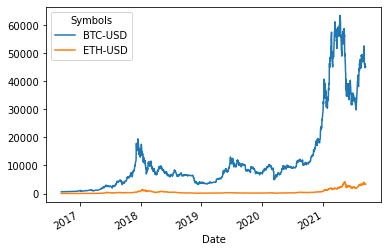

In [8]:
df.plot()
plt.show()

## The prices of bitcoing and ehethereum vary a lot so they are hard to compare

## To compare the cryptocurrencies we would have to work with returns and not absolute prices

In [9]:
daily_returns = df.pct_change().dropna(axis = 0)

In [10]:
daily_returns

Symbols,BTC-USD,ETH-USD
Date,,
2016-09-13,0.002369,0.000378
2016-09-14,-0.005779,0.001157
2016-09-15,-0.000300,0.051839
2016-09-16,-0.001629,0.011373
2016-09-17,0.006419,-0.021057
...,...,...
2021-09-09,-0.032495,-0.062974
2021-09-10,0.007075,0.018301
2021-09-11,0.019066,0.042766


## We are making the returns cummulative to make the cryptocurrencies comparable

In [12]:
daily_cummulative_returns = (daily_returns + 1).cumprod() - 1

In [13]:
daily_cummulative_returns

Symbols,BTC-USD,ETH-USD
Date,,
2016-09-13,0.002369,0.000378
2016-09-14,-0.003424,0.001535
2016-09-15,-0.003723,0.053454
2016-09-16,-0.005346,0.065435
2016-09-17,0.001039,0.043000
...,...,...
2021-09-09,72.671844,268.451014
2021-09-10,73.193061,273.382107
2021-09-11,74.607629,285.116310


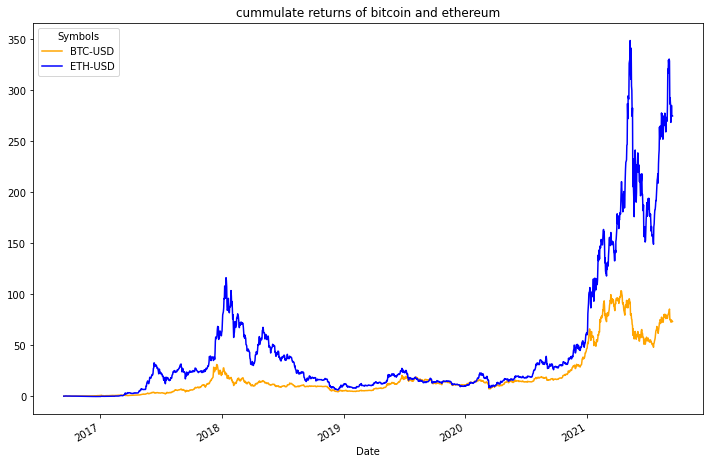

In [15]:
colours = ['orange' , 'b']

daily_cummulative_returns.plot( color = colours , figsize = (12,8))
plt.title ("cummulate returns of bitcoin and ethereum")
plt.show()

## The price charts for the last four years



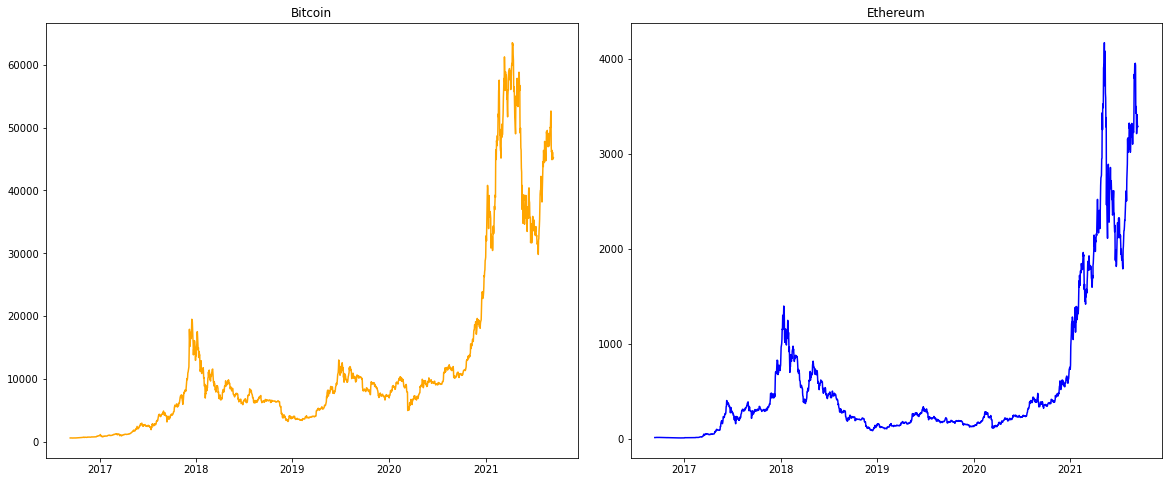

In [26]:
fig, axs = plt.subplots( 1, 2, figsize = (20,8) , gridspec_kw = { 'hspace' : 0.2 , 'wspace' : 0.1 })

axs[0].plot(df['BTC-USD'], c = 'orange')
axs[0].set_title('Bitcoin')

axs[1].plot(df['ETH-USD'] , c = 'blue' ) 
axs[1].set_title('Ethereum')

plt.show()

## Comparisons of daily volatilities chart 


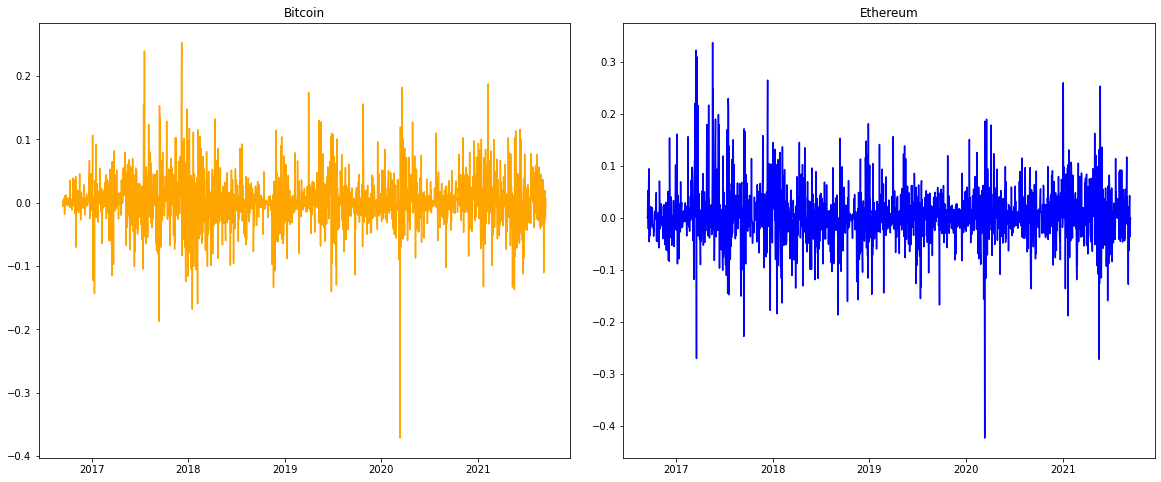

In [25]:
fig, axs = plt.subplots( 1, 2, figsize = (20,8) , gridspec_kw = { 'hspace' : 0.2 , 'wspace' : 0.1 })


axs[0].plot(daily_returns['BTC-USD'], c = 'orange')
axs[0].set_title('Bitcoin')

axs[1].plot(daily_returns['ETH-USD'] , c = 'blue' ) 
axs[1].set_title('Ethereum')

plt.show()

## How are the returns distributed ? 

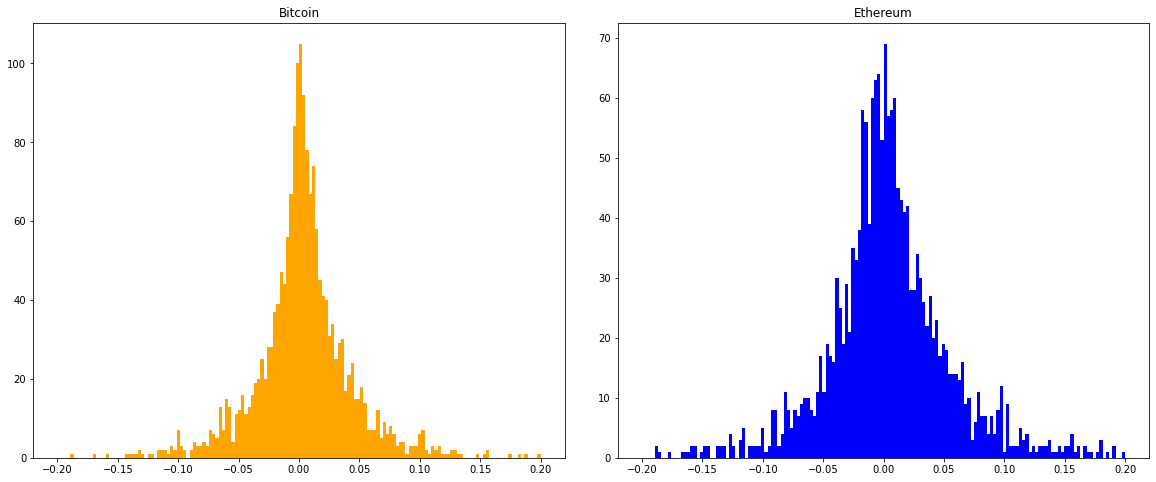

In [32]:
fig, axs = plt.subplots( 1, 2, figsize = (20,8) , gridspec_kw = { 'hspace' : 0.2 , 'wspace' : 0.1 })


axs[0].hist(daily_returns['BTC-USD'], bins = 150, color = 'orange', range = (-0.2,0.2))
axs[0].set_title('Bitcoin')

axs[1].hist(daily_returns['ETH-USD'] , bins = 150, color = 'blue' ,  range = (-0.2,0.2)) 
axs[1].set_title('Ethereum')

plt.show()

## Extreme Returns

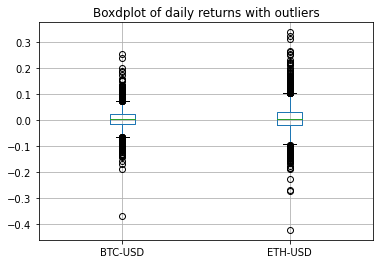

In [33]:
daily_returns.boxplot()

plt.title("Boxdplot of daily returns with outliers")

plt.show()

## Extreme Returns

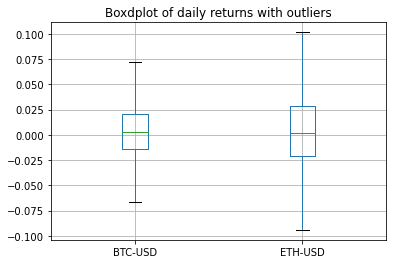

In [34]:
daily_returns.boxplot(showfliers = False)

plt.title("Boxdplot of daily returns with outliers")

plt.show()

## Correlation of Bitcoin and Ethereum

In [35]:
daily_returns.corr()

Symbols,BTC-USD,ETH-USD
Symbols,,
BTC-USD,1.00000,0.64776
ETH-USD,0.64776,1.00000


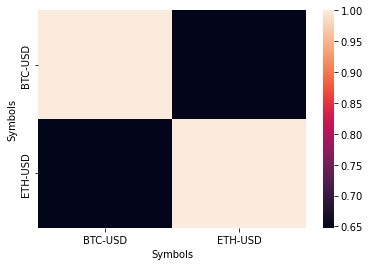

In [37]:
sns.heatmap(daily_returns.corr())

plt.show()

# Developing a forecasting module with Bitcoin

## Backtesting a forecasting module with Bitcoin 

## Going back in time and seeing how a prediction would have performed

In [40]:
from fbprophet import Prophet
import warnings
warnings.simplefilter( action = 'ignore' , category = FutureWarning)

In [41]:
end1 = dt.date(end.year - 1, end.month, end.day ) # one year back
end2 = dt.date(end.year, end.month - 6 , end.day ) # six months back
start1 = dt.date(end1.year - 5, end.month, end.day) 


In [60]:
df1 = reader.get_data_yahoo ( cryptolist , start1 , end1 )['Adj Close']

df2 = reader.get_data_yahoo ( cryptolist , start1 , end2 )['Adj Close']

In [45]:
df1


Symbols,BTC-USD,ETH-USD
Date,,
2015-09-12,230.511993,0.936003
2015-09-13,230.643997,0.875622
2015-09-14,230.304001,0.944410
2015-09-15,229.091003,0.907175
2015-09-16,229.809998,0.874231
...,...,...
2020-09-09,10363.138672,368.101898
2020-09-10,10400.915039,374.695587
2020-09-11,10442.170898,387.183105


In [48]:
df2

Symbols,BTC-USD,ETH-USD
Date,,
2015-09-12,230.511993,0.936003
2015-09-13,230.643997,0.875622
2015-09-14,230.304001,0.944410
2015-09-15,229.091003,0.907175
2015-09-16,229.809998,0.874231
...,...,...
2021-03-10,56008.550781,1799.166260
2021-03-11,57805.121094,1826.194946
2021-03-12,57332.089844,1772.102417


## Creating models for Bitcoin and Ethereum using both the dataframes

In [61]:
model_fb_1_btc = Prophet() 

df1 = df1.reset_index()

df1[[ 'ds' , 'y' ]] = df1[[ 'Date' , 'BTC-USD' ]] 

model_fb_1_btc.fit(df1)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
model_fb_1_eth = Prophet() 

df1[[ 'ds' , 'y' ]] = df1[[ 'Date' , 'ETH-USD' ]] 

model_fb_1_eth.fit(df1)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
model_fb_2_btc = Prophet() 

df2 = df2.reset_index()

df2[[ 'ds' , 'y' ]] = df2[[ 'Date' , 'BTC-USD' ]] 

model_fb_2_btc.fit(df2)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
model_fb_2_eth = Prophet() 

df2[[ 'ds' , 'y' ]] = df2[[ 'Date' , 'BTC-USD' ]] 

model_fb_2_eth.fit(df2)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
# Future of bitcoin and ethereum 

future_1_btc = model_fb_1_btc.make_future_dataframe(periods = 365)

future_1_eth = model_fb_1_eth.make_future_dataframe(periods = 365) 


In [67]:
future_2_btc = model_fb_2_btc.make_future_dataframe(periods = 180)

future_2_eth = model_fb_2_eth.make_future_dataframe(periods = 180)

## Getting forecasts

In [68]:
forecast_1_btc = model_fb_1_btc.predict(future_1_btc)

forecast_1_eth = model_fb_1_eth.predict(future_1_eth)

forecast_2_btc = model_fb_2_btc.predict(future_2_btc)

forecast_2_eth = model_fb_2_eth.predict(future_2_eth)

# Plotting the data

## For the one year data


## Bitcoin 

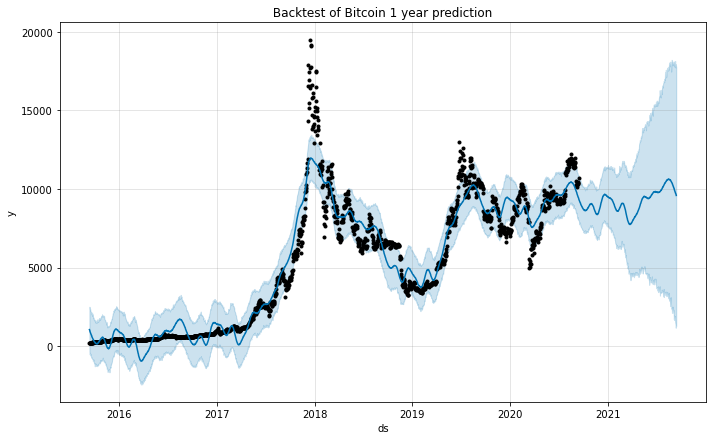

In [69]:
model_fb_1_btc.plot(forecast_1_btc)

plt.title(' Backtest of Bitcoin 1 year prediction ')

plt.show()

## Ethereum 

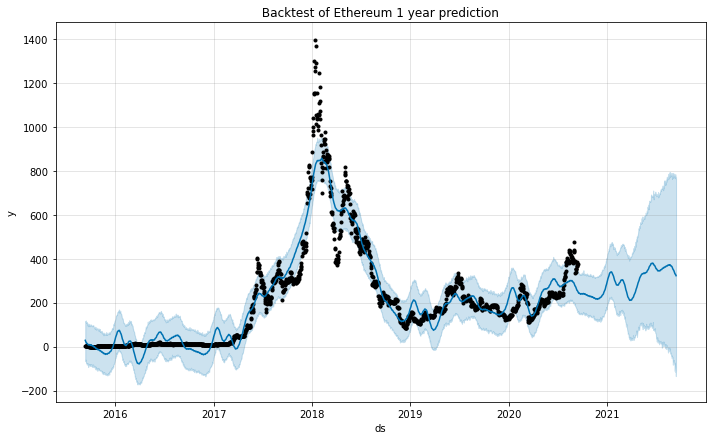

In [70]:
model_fb_1_eth.plot(forecast_1_eth)

plt.title(' Backtest of Ethereum 1 year prediction ')

plt.show()

## For the six month data


## Bitcoin 


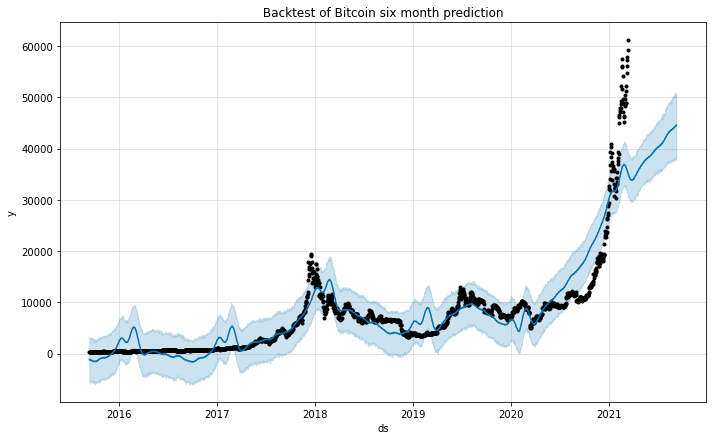

In [71]:
model_fb_2_btc.plot(forecast_2_btc)

plt.title(' Backtest of Bitcoin six month prediction ')

plt.show()

## The six month horizon data has better accuracy for bitcoin

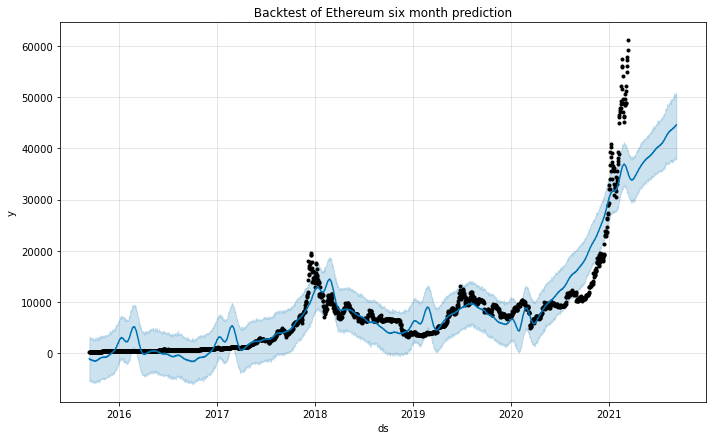

In [72]:
model_fb_2_eth.plot(forecast_2_eth)

plt.title(' Backtest of Ethereum six month prediction ')

plt.show()

## The same is observed for Ethereum 

# Where will bitcoin and ethereum be in six months from now ? 

In [74]:
model_fb_3_btc = Prophet()

df = df.reset_index()

df[['ds' , 'y' ]] = df [[ 'Date' , 'BTC-USD' ]] 

model_fb_3_btc.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
model_fb_3_eth = Prophet()

df = df.reset_index()

df[['ds' , 'y' ]] = df [[ 'Date' , 'ETH-USD' ]] 

model_fb_3_eth.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
future_3_btc = model_fb_3_btc.make_future_dataframe(periods = 180)

future_3_eth = model_fb_3_eth.make_future_dataframe(periods = 180)


In [77]:
forecast_3_btc = model_fb_3_btc.predict(future_3_btc)

forecast_3_eth = model_fb_3_eth.predict(future_3_eth)


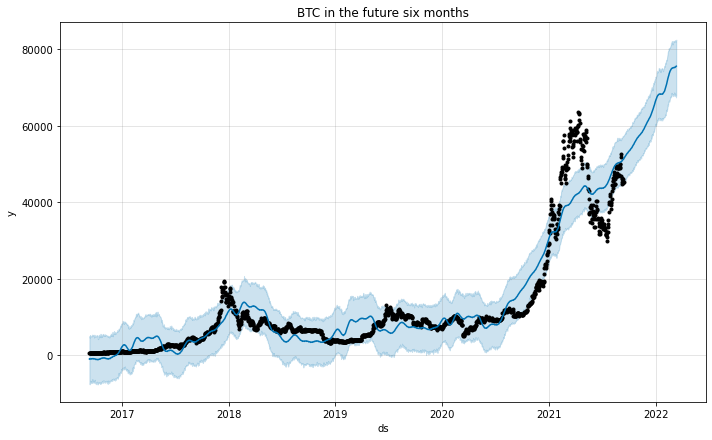

In [79]:
model_fb_3_btc.plot(forecast_3_btc)

plt.title('BTC in the future six months')

plt.show()

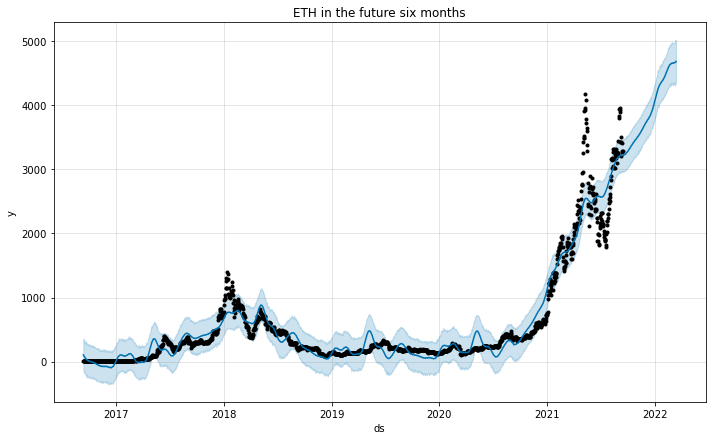

In [81]:
model_fb_3_eth.plot(forecast_3_eth)

plt.title('ETH in the future six months')

plt.show()